<a href="https://colab.research.google.com/github/Dyl-cmyk/datascience/blob/Assignments-Due/Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Yes! I cant remember which model exaclty it was, but one of them I had a number of little humps in the middle that I could not get the model to match and I really wanted it to. In hindsight I probably don't need it but I would like to try and see if I can turn, what I concluded as, a bad model. Into something that may have some more viability be being able to model some more of the details using the polynomials

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

You would actually be much better off using a simpler model whenever the relationship between the data is more simple. Polynomial models have a tendency to overfit the data and this can have a negative effect on simpler models

**Task3**:

What's the point of using b splines?

B spines are used to help reduce overfitting in your polynomial regressions. This can be done by applying a piecewise function to different areas of your model to "taylor" each section and reduce overfitting.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

Okay lets try this...
A Gaussian Process, like A NN, fits knots onto data--every possible datapoint to be exact--these knots are then kept track of and their relationship to all the other knots is studied the GPs then try to look at these relationships in a number of different ways in order to find the best fit......yea???

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-ar17xaz8
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-ar17xaz8
  Resolved https://github.com/pydata/xarray.git to commit 0caf09628011f9790d6e8df62fe92c485c7382ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev17+g0caf0962-py3-none-any.whl size=1260150 sha256=9b5ecbc1d94e7fa585d80f028d2880fe43465d9c8d8b569f92faffc17b14232a
  Stored in directory: /tmp/pip-ephem-wheel-cache-utdb427y/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.1 MB/s eta 0:00:00
   ━

In [2]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [3]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')

In [4]:
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [8]:
#im gonna try a 3 degree model
modelhow_poly_3 = bmb.Model("weight ~ poly(height, degree=3)", howell, family="negativebinomial")
idatahow_poly_3 = modelhow_poly_3.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


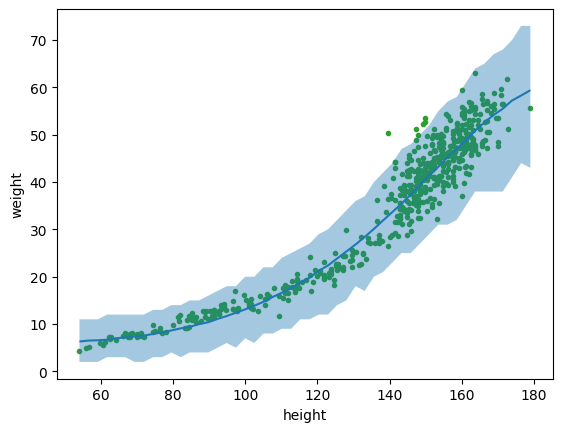

In [10]:
bmb.interpret.plot_predictions(modelhow_poly_3, idatahow_poly_3, "height", pps=True)
#raw data
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

BOOOOM!! That was easy

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned that the person in this article is using the gaussian processes to

1) Help identifiy the data by eliminating the noise

2) Enhance the perdictions of the graphs using knots

3) Use the GP's priors to inform other parts of the model to be more accurate

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

My Favorite graph is

This one

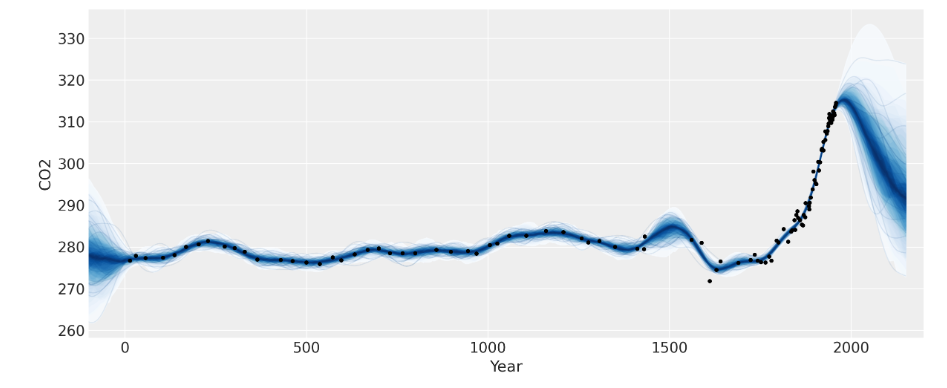

Which Then leads into this one

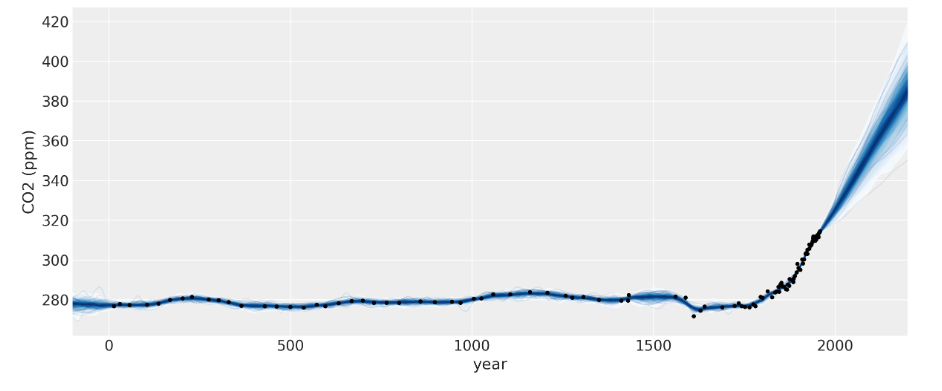

These are my favorites because they showcase how the Gaussian Processes influennce the result of the graph.